Importing the **pandas** library, which provides necessary tools for exploratory data analysis.

In [1]:
import pandas as pd

Loading the Steam sales dataset from the data folder into a pandas DataFrame and displaying the first few rows to preview the data.

In [ ]:
steam_sales_path= "../data/steam_sales.csv"
df = pd.read_csv(steam_sales_path)
df.head()

In [4]:
df.describe()

,Rating,Discount%,Price (€),Original Price (€),Windows,Linux,MacOS
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,6.433346,-51.055053,12.742993,27.949866,0.996068,0.185608,0.281950
std,1.279637,23.132706,8.990933,15.762686,0.062597,0.388866,0.450038
min,3.000000,-95.000000,0.530000,2.990000,0.000000,0.000000,0.000000
25%,5.000000,-74.500000,5.990000,15.990000,1.000000,0.000000,0.000000
50%,7.000000,-50.000000,9.990000,24.990000,1.000000,0.000000,0.000000
75%,7.000000,-30.000000,16.990000,39.990000,1.000000,0.000000,1.000000
max,8.000000,-10.000000,64.990000,99.990000,1.000000,1.000000,1.000000


### Descriptive Statistics Summary

The dataset contains 2,543 entries with numerical data available for ratings, discounts, prices, and platform availability. On average, games have a rating of around 6.4 out of 8 and an average discount of about 51%, suggesting that most titles are often sold below their original price. The mean price after discounts is €12.74, compared to an average original price of €27.95, indicating a significant reduction in selling prices across the dataset. Most games appear to support Windows, while Linux and macOS availability are much lower.

### Note on Date Column

The release date column was not included in the summary because it is stored as a non-numeric datatype (`object`) and therefore excluded from numerical descriptive analysis.

In [5]:
df.dtypes

Game Name              object
Rating                float64
#Reviews               object
Discount%             float64
Price (€)             float64
Original Price (€)    float64
Release Date           object
Windows                 int64
Linux                   int64
MacOS                   int64
Fetched At             object
dtype: object

Converting the **Release Date** column from text to a datetime format to enable accurate time-based analysis and filtering.

In [16]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format="%d %b, %Y", errors='coerce')

df.head()

,Game Name,Rating,#Reviews,Discount%,Price (€),Original Price (€),Release Date,Windows,Linux,MacOS,Fetched At,Release Year,Price Range,Year Interval
0,PEAK,7.0,"77,683",-38.0,4.64,7.49,2025-06-16,1,0,0,2025-08-11 00:00,2025.0,0-30,2025+
1,Cyberpunk 2077,7.0,"772,574",-65.0,20.99,59.99,2020-12-09,1,0,1,2025-08-11 00:00,2020.0,50-60,2020–2024
2,Rust,7.0,"1,038,433",-50.0,19.99,39.99,2018-02-08,1,0,1,2025-08-11 00:00,2018.0,30-40,2015–2019
3,Microsoft Flight Simulator (2020) 40th Anniver...,5.0,"63,905",-60.0,27.99,69.99,2020-08-17,1,0,0,2025-08-11 00:00,2020.0,60+,2020–2024
4,Sid Meier's Civilization VII,4.0,"34,643",-30.0,48.99,69.99,2025-02-10,1,1,1,2025-08-11 00:00,2025.0,60+,2025+


In [8]:
df.describe()

,Rating,Discount%,Price (€),Original Price (€),Release Date,Windows,Linux,MacOS
count,2543.000000,2543.000000,2543.000000,2543.000000,732,2543.000000,2543.000000,2543.000000
mean,6.433346,-51.055053,12.742993,27.949866,2021-09-30 02:55:04.918032896,0.996068,0.185608,0.281950
min,3.000000,-95.000000,0.530000,2.990000,2006-12-07 00:00:00,0.000000,0.000000,0.000000
25%,5.000000,-74.500000,5.990000,15.990000,2019-09-20 12:00:00,1.000000,0.000000,0.000000
50%,7.000000,-50.000000,9.990000,24.990000,2022-12-07 00:00:00,1.000000,0.000000,0.000000
75%,7.000000,-30.000000,16.990000,39.990000,2024-10-07 12:00:00,1.000000,0.000000,1.000000
max,8.000000,-10.000000,64.990000,99.990000,2025-09-14 00:00:00,1.000000,1.000000,1.000000
std,1.279637,23.132706,8.990933,15.762686,NaN,0.062597,0.388866,0.450038


### Creating Price and Year Categories for Cross-Tabulation

This section categorizes games by both **price range** and **release year interval** to explore how pricing patterns have evolved over time.

1. **Extracting Release Year**  
   The `Release Year` column is created by converting the `Release Date` into its numeric year component. This allows grouping and comparison by year.

2. **Defining Price Ranges**  
   Games are divided into price brackets (`0–30`, `30–40`, `40–50`, `50–60`, `60+`) using `pd.cut()`.  
   This simplifies the continuous price data into discrete categories suitable for comparison.

3. **Defining Year Intervals**  
   The `Release Year` values are grouped into 5-year intervals starting from 2000 (e.g., `2000–2004`, `2005–2009`, …).  
   This reduces year-to-year variability and highlights long-term trends.

4. **Cross-Tabulation**  
   A cross-tab (`pd.crosstab`) is created to count the number of games within each **price range** and **year interval** combination.  
   The resulting table shows how the distribution of game prices has changed across different release periods.


In [17]:
df['Release Year'] = df['Release Date'].dt.year
price_bins = [0, 30, 40, 50, 60, float('inf')]
price_labels = ['0-30', '30-40', '40-50', '50-60', '60+']

df['Price Range'] = pd.cut(df['Original Price (€)'], bins=price_bins, labels=price_labels, right=False)

year_bins = [2000, 2005, 2010, 2015, 2020, 2025, 2030]
year_labels = ['2000–2004', '2005–2009', '2010–2014', '2015–2019', '2020–2024', '2025+']

df['Year Interval'] = pd.cut(df['Release Year'], bins=year_bins, labels=year_labels, right=False)

cross_tab = pd.crosstab(df['Price Range'], df['Year Interval'])
cross_tab

Year Interval,2005–2009,2010–2014,2015–2019,2020–2024,2025+
Price Range,,,,,
0-30,10,31,106,266,121
30-40,0,3,21,65,13
40-50,0,2,8,33,6
50-60,0,3,6,23,3
60+,0,0,1,7,4


### Cross-Tabulation of Price Range by Release Year Interval

This table shows the distribution of games across different price categories and release periods.  
Lower-priced games (€0–30) dominate all intervals, especially from **2020–2024**, indicating a strong market presence of discounted or lower-cost titles in recent years.  
Mid-range prices (€30–60) appear less frequently, suggesting that fewer games are released at higher price points on Steam.  
The gradual increase in counts across all categories after 2015 reflects the platform’s growth and a larger overall volume of releases in the last decade.  
Further analysis of the **price distribution over time** is needed to determine whether these trends are driven by changing market strategies, consumer demand, or shifts in the types of games being published.


### Filtering Games Released Before 2015

This step filters the dataset to include only games released before the year 2015.  
By displaying their names, release dates, original prices, and ratings, it provides a clearer view of early Steam titles and allows comparison of pricing and quality trends before the platform’s major expansion period.


In [13]:
games_before_2010 = df[df['Release Date'].dt.year < 2015]
games_before_2010[['Game Name', 'Release Date', 'Original Price (€)', 'Rating']]


,Game Name,Release Date,Original Price (€),Rating
17,Europa Universalis IV,2013-08-13,49.99,7.0
70,Call of Duty®: Black Ops II,2012-11-12,59.99,7.0
97,Fallout: New Vegas,2010-10-21,9.99,8.0
103,Far Cry® 4,2014-11-17,29.99,7.0
129,IL-2 Sturmovik: Battle of Stalingrad,2014-10-22,48.99,5.0
145,Resident Evil 5,2009-09-15,19.99,7.0
146,Sid Meier's Civilization® V,2010-09-23,29.99,8.0
150,Wolfenstein: The New Order,2014-05-19,19.99,7.0
181,Resident Evil 6,2013-03-21,19.99,5.0
182,Prototype 2,2012-07-26,29.99,5.0


This step filters the dataset to include only games released before the year 2015.  
By displaying their names, release dates, original prices, and ratings, it provides a clearer view of early Steam titles and allows comparison of pricing and quality trends before the platform’s major expansion period.  
While this list offered useful insight into early releases, a **visualization** was needed to better understand how game releases and pricing evolved over time.


### Visualizing Game Release Distribution by Year

This code converts release dates to a datetime format, extracts the release year, and counts how many games were released each year.  
The results are displayed as a bar chart, providing a clear visualization of how the number of Steam game releases has changed over time and highlighting periods of growth or decline in publishing activity.

Matplotlib is building the font cache; this may take a moment.


Release Year
2006.0      1
2007.0      2
2008.0      4
2009.0      3
2010.0      5
2011.0      3
2012.0      7
2013.0     10
2014.0     14
2015.0     16
2016.0     25
2017.0     28
2018.0     38
2019.0     35
2020.0     66
2021.0     52
2022.0     59
2023.0     93
2024.0    124
2025.0    147
Name: count, dtype: int64


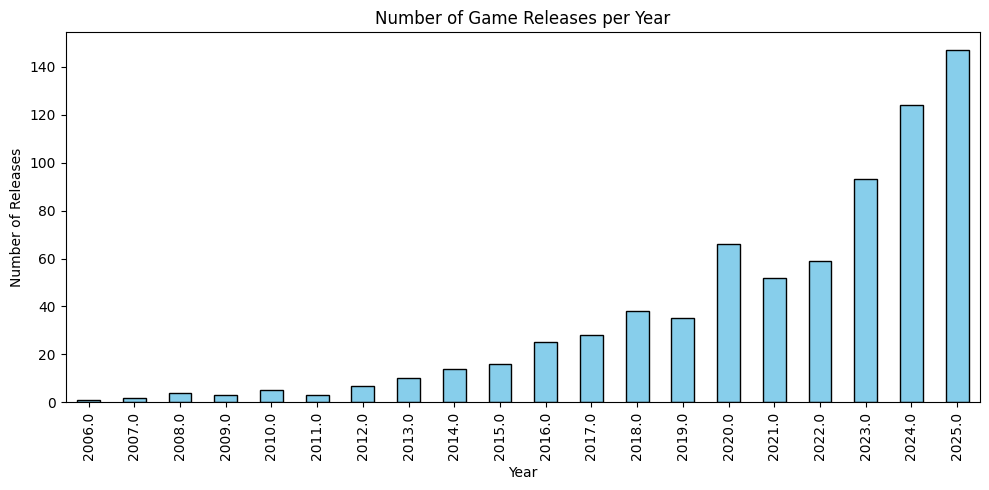

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Release Date is a datetime column
df['Release Date'] = pd.to_datetime(df['Release Date'], format="%d %b, %Y", errors='coerce')

# Extract the release year
df['Release Year'] = df['Release Date'].dt.year

# Count number of games released each year
release_distribution = df['Release Year'].value_counts().sort_index()

# Display the distribution
print(release_distribution)

# Plot as bar chart
plt.figure(figsize=(10, 5))
release_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Game Releases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.tight_layout()
plt.show()


### Analysis of Game Release Distribution (2006–2025)

The distribution of releases is uneven, reflecting the growth of Steam as a publishing platform rather than the entire gaming industry. 

Between **2006 and 2014**, the dataset includes very few titles per year, suggesting limited adoption of Steam by major publishers and an incomplete sample of total releases. These early values should be treated cautiously, as they are not representative of the market.

From **2015 to 2019**, release counts rise steadily, marking the transition to a broader and more open distribution era. This period aligns with the introduction of Steam Direct (2017), which reduced publishing barriers and led to a gradual increase in indie releases.

After **2020**, there is a sharp acceleration in new titles. The expansion corresponds with the pandemic-driven growth in digital entertainment, easier access to development tools, and continued diversification of the platform. 

Overall, meaningful trend analysis should focus on **2015–2025**, when data density and platform maturity make the sample more reliable for examining price, genre, and rating trends.
